# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Sanjuanita Velazquez Project 1 Learner_Notebook_Full_Code.ipynb" \
--output "/content/drive/MyDrive/Python Course/Sanjuanita_Project1.html"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Sanjuanita Velazquez Project 1 Learner_Notebook_Full_Code.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 13 image(s).
[NbConvertApp] Writing 797653 bytes to /content/drive/MyDrive/Python Course/Sanjuanita_Project1.html


In [ ]:
# Write your code here to read the data

path="/content/drive/MyDrive/Python Course/foodhub_order.csv"

food_hub=pd.read_csv(path)

In [ ]:
# Write your code here to view the first 5 rows
food_hub.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
rows, columns = food_hub.shape

# Print the number of rows and columns
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 1898
Number of columns: 9


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here

print(f"These are the dataypes summary per column", food_hub.info())

print('---------------------------------------------------------')
print('----------------------------------------------------------\n')

#code to further investiage rating column
print('All of the datatypes look correspoding to each column except for ratings')

print('Ratings column data type:',food_hub['rating'].dtype)
print('------------------------------------------------------------------------')

#checking for unique values in rating column . This will give me an idea of
#what values are given to the object data type
print('These are the values in the rating column: ',food_hub['rating'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
These are the dataypes summary per column None
---------------------------------------------------------
----------------------------------------------------------

All of the datatypes look correspoding to each column except for ratings
Ratings column data 

#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
#step 1 look for missing values throught my entire dataframe
print('Looking for Null Values first')
print(food_hub.isnull().sum())
print('--------------------------\n')

Looking for Null Values first
order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64
--------------------------



There are no missing values because Not given is still a value in the data

#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
#statistical summary of all my data
print('This is all my data statistical analysis \n',food_hub.describe())
print('------------------------------------------------------------------')


#statistical summary for food preperation time coulumn
#I want to isolate the food preperation column so I can print out individual results

#assigning a new name to dataframe to be able to extract the mean, max,min
food_prep_time = food_hub["food_preparation_time"]
average_prep_time = food_prep_time.mean()
max_prep_time = food_prep_time.max()
min_prep_time = food_prep_time.min()


#results of only food preperation
print('once the order is prepared it takes an minimum of: ',min_prep_time)
print('once the order is prepared it takes an average of: ', average_prep_time)
print('once the order is prepared it takes an maximum of: ', max_prep_time)

This is all my data statistical analysis 
            order_id    customer_id  cost_of_the_order  food_preparation_time  \
count  1.898000e+03    1898.000000        1898.000000            1898.000000   
mean   1.477496e+06  171168.478398          16.498851              27.371970   
std    5.480497e+02  113698.139743           7.483812               4.632481   
min    1.476547e+06    1311.000000           4.470000              20.000000   
25%    1.477021e+06   77787.750000          12.080000              23.000000   
50%    1.477496e+06  128600.000000          14.140000              27.000000   
75%    1.477970e+06  270525.000000          22.297500              31.000000   
max    1.478444e+06  405334.000000          35.410000              35.000000   

       delivery_time  
count    1898.000000  
mean       24.161749  
std         4.972637  
min        15.000000  
25%        20.000000  
50%        25.000000  
75%        28.000000  
max        33.000000  
-----------------------------

#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
not_given_count = (food_hub['rating'] == 'Not given').sum()
print("Number of 'Not given' ratings/Not Rated Orders:", not_given_count)

Number of 'Not given' ratings/Not Rated Orders: 736


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

In [ ]:
print(food_hub['day_of_the_week'].unique())
print(food_hub['day_of_the_week'].value_counts())

['Weekend' 'Weekday']
Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64


### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

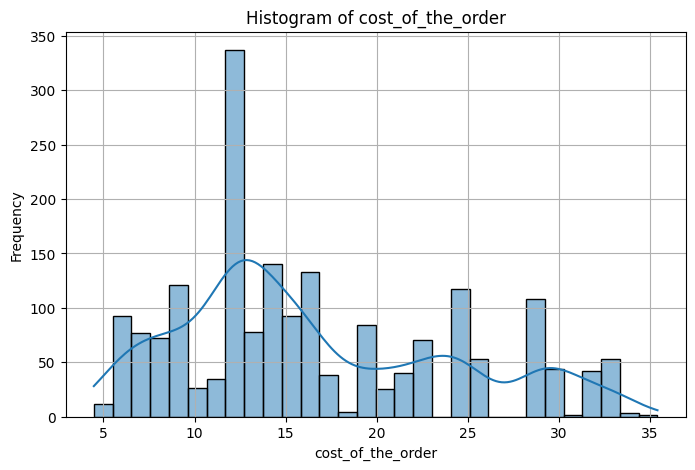

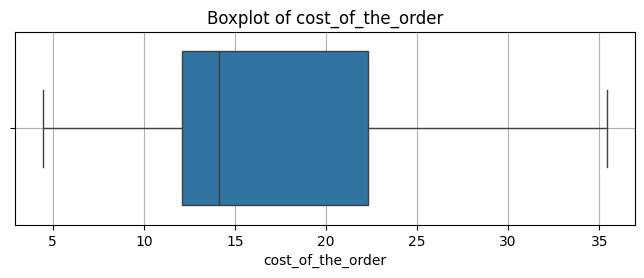

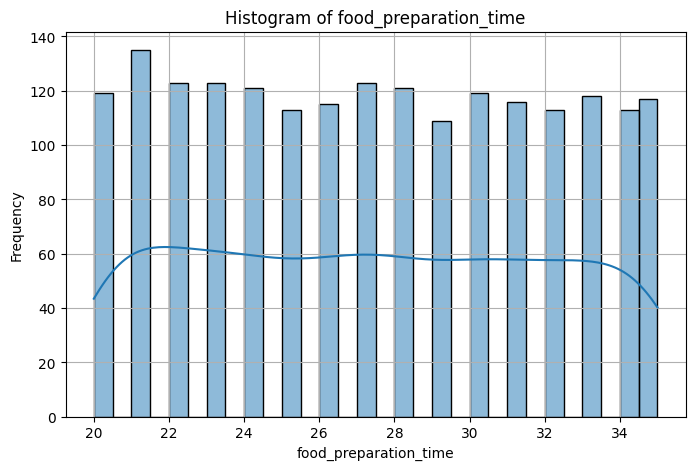

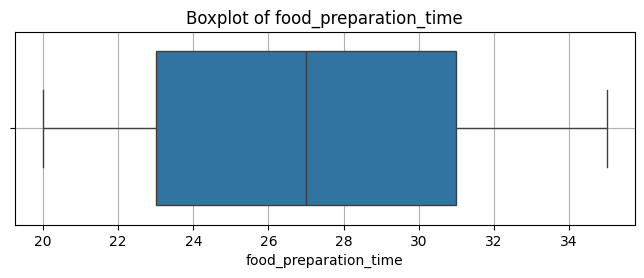

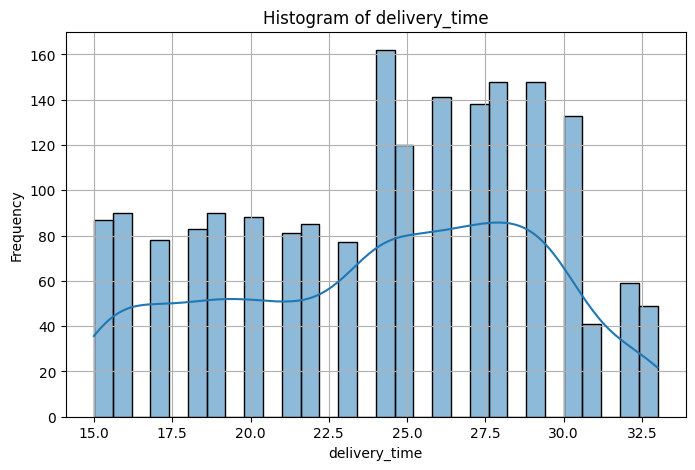

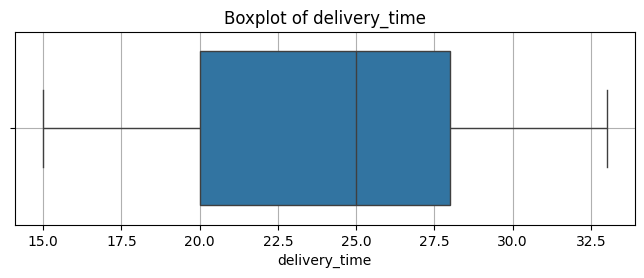

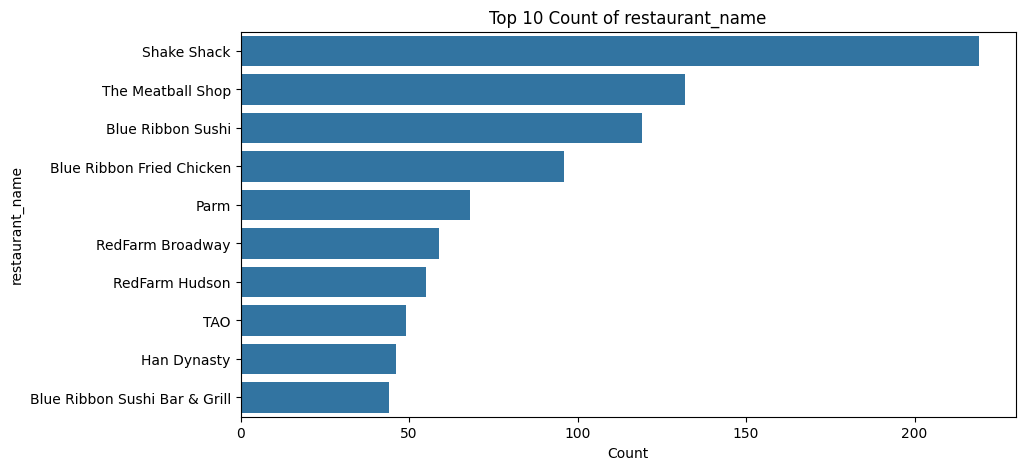

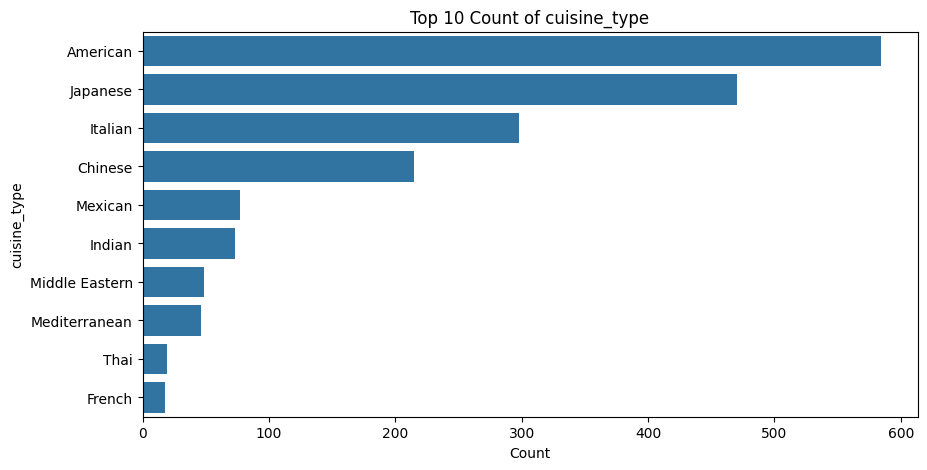

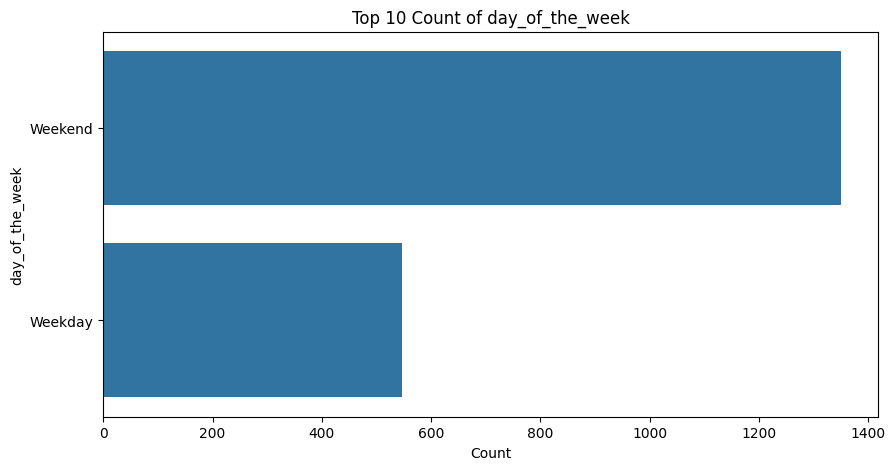

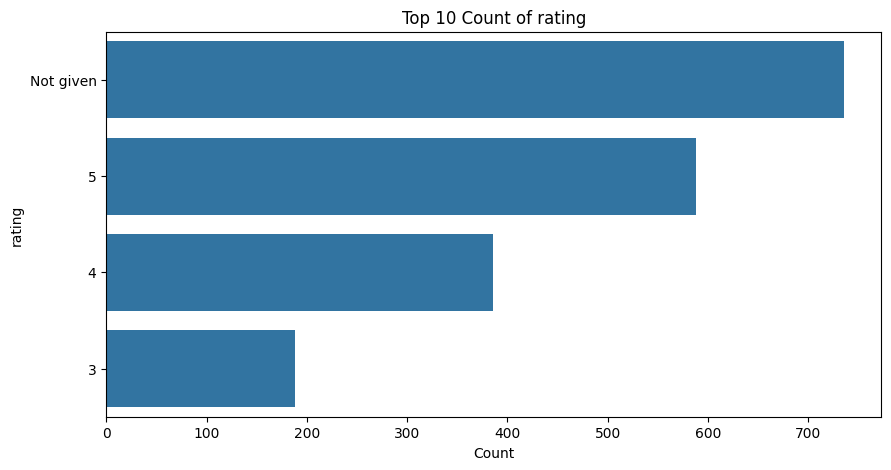

In [ ]:
# Write the code here

#Will bring in only my columns with observations that are numerical in nature
#step 1 create my column list
numerical_columns = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']

#will iterate thru each column and create new list that runs thru the steps to building a histogram,boxplot.
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=food_hub, x=col, kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.savefig(f"histogram_{col}.jpg", bbox_inches='tight')
    plt.show()


    # Boxplot
    plt.figure(figsize=(8, 2.5))
    sns.boxplot(data=food_hub, x=col)
    plt.title(f'Boxplot of {col}')
    plt.grid(True)
    plt.savefig(f"boxplot_{col}.jpg", bbox_inches='tight')
    plt.show()




#Will do the same for the categorical columns
categorical_columns = ['restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating']
#iterated thru my categorical list and applied the graphs
for col in categorical_columns:
  plt.figure(figsize=(10, 5))
  sns.countplot(data=food_hub, y=col, order=food_hub[col].value_counts().index[:10])
  plt.title(f'Top 10 Count of {col}')
  plt.xlabel("Count")
  plt.ylabel(col)


  plt.savefig(f"countplot_{col}.jpg", bbox_inches='tight')
  plt.show()



# **Numerical**
##Cost of the order  
Histogram shows that its right skewed that means that there are few orders that cost more.

Boxplot: there are some outliers on the higer side , so some restuarants are taking longer time to preperate food.

##Food Preperation
Historgram
the distribution was difficult to see but I think its right skewed that indicates that most meals take about 20-25 min of preperation .
boxplot
Tight interquartile with some outliers .

##Delivery time
Histogram Normal distribution with deliveries happening between 15-30 min
boxplot comparing with cost of order there are few outliers

# **Categocial**

##Restaurant name
Countplots: Shake shack, blue ribbon sushi apeare more frequently and dominate the volume order.
##Couisine type
countplots: American cuisine is the most popular by a significant amount

##Day of the week
countplots weekends have higher order volume on satruday and sunday
on Tuesdays and Wednesdays there is low activity .

##Ratings
countplots: most ratings are 4 inidcates postivie customer satisfaction .

There’s a noticeable number of 'Not given' entries these represent unrated orders and should be treated carefully in analysis

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
#if there is record in the dataset it means there is an order
top_5_restaurants = food_hub['restaurant_name'].value_counts().head(5)
print('These are the top 5 restaurants by number of orders')
print(top_5_restaurants)


These are the top 5 restaurants by number of orders
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
#need to get the unique values of day of the week
food_hub['day_of_the_week'].unique()


#filter for only weekend orders , and assigned it to a new dataframe with only weekend records
weekend_orders = food_hub[food_hub['day_of_the_week']=='Weekend']

#find the count of the cuisine type
popular_cuisine = weekend_orders['cuisine_type'].value_counts().idxmax()

print('The most popular cuisine on weekends is:',popular_cuisine)



The most popular cuisine on weekends is: American


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]


In [ ]:
# Write the code here


#finding orders that cost more than $20
twenty_dollar_orders= (food_hub['cost_of_the_order'] > 20).sum()
#print(twenty_dollar_orders)


#total number of all orders

total_orders = food_hub.shape[0]


#percentage calculation
above_twenty = (twenty_dollar_orders/total_orders)*100

print(f"The percentage of orders that cost more than $20 is: {above_twenty:.2f}")


The percentage of orders that cost more than $20 is: 29.24


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
average_delivery_time = food_hub['delivery_time'].mean()

print(f"The mean order delivery time is: {average_delivery_time:.2f} minutes")


The mean order delivery time is: 24.16 minutes


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here

#count the top 3 most frequest customer
top_customers = food_hub['customer_id'].value_counts().head(3)

print('These are the top 3 most frequent customers')
print(top_customers)

These are the top 3 most frequent customers
52832    13
47440    10
83287     9
Name: customer_id, dtype: int64


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


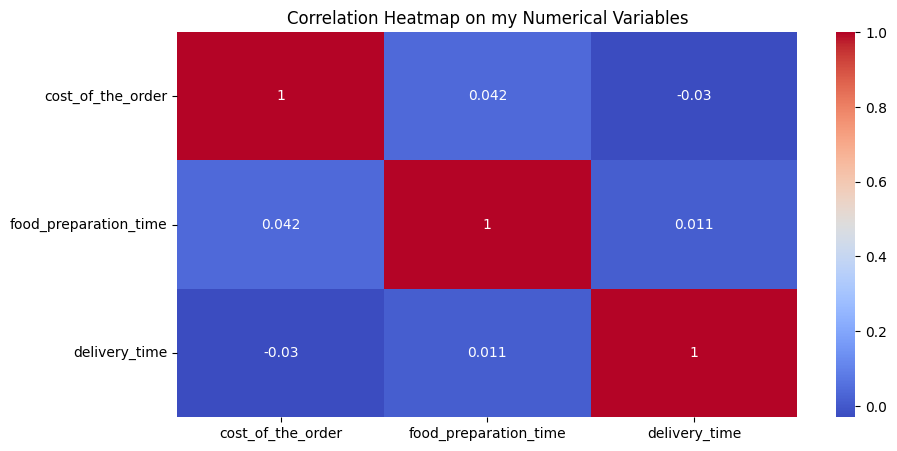

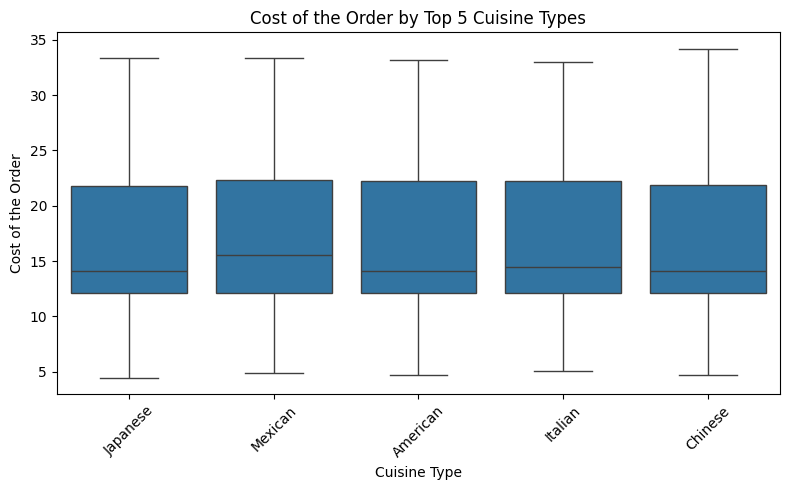

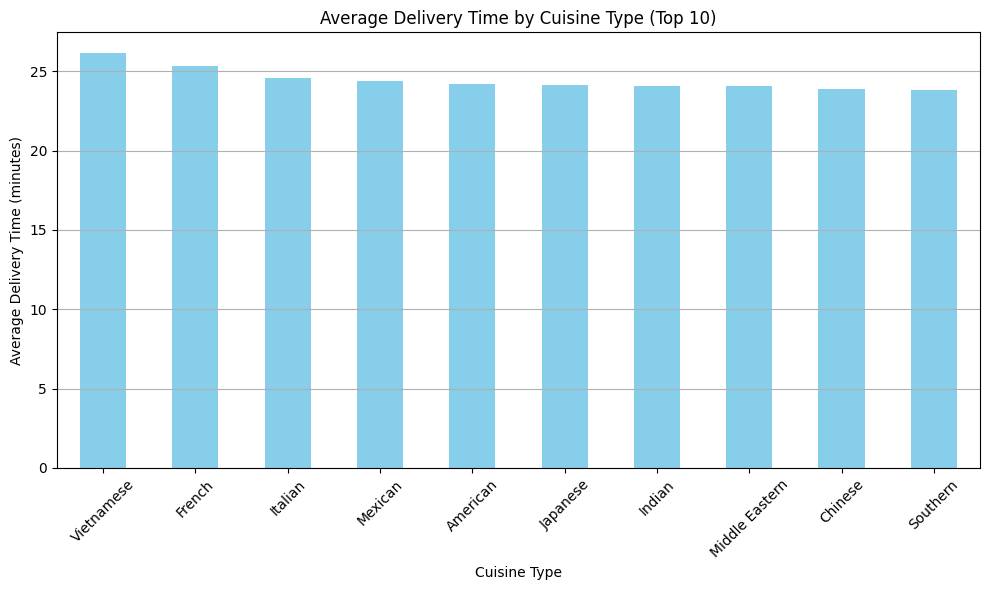

In [ ]:
# Write the code here

#define all my numberical columns
numerical_columns = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']

plt.figure(figsize=(10, 5))
sns.heatmap(food_hub[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap on my Numerical Variables')
plt.show()


#catergoical vs numerical see if the top5 cuisines have a relationship to ratings.
top_cuisines = food_hub['cuisine_type'].value_counts().head(5).index
top5 = food_hub[food_hub['cuisine_type'].isin(top_cuisines)]
#build my figure/boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=top5, x='cuisine_type', y='cost_of_the_order')
plt.title('Cost of the Order by Top 5 Cuisine Types')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of the Order')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#average deliver time by cuisine , want to see if it takes longer to deliver some food vs other
mean_delivery = food_hub.groupby('cuisine_type')['delivery_time'].mean().sort_values(ascending=False)
#build my bar
plt.figure(figsize=(10, 6))
mean_delivery.head(10).plot(kind='bar', color='skyblue')
plt.title('Average Delivery Time by Cuisine Type (Top 10)')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Delivery Time (minutes)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



Observations 12
#**Heatmap **
takes into consideration the correlation between numberical variables only . There are no strong relationships . Correlation are close to 0 meaning varaiables are independend to each other. so , preping food or delivery time doesnt necessary mean higher cost.
#**boxplot**
distribution of order cost for the five most popular cuisine types
all have similar medians about $14 to $15 dollars
there are outliers
  
#**bargraph**
Vietnamese and french cuisine have the longest delivery time of about 25 to 26 min and compared to Chinese , southern and american that are about 24 min.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here

# Step 1: Filter out rows where rating is 'Not given'
filtered_df = food_hub[food_hub['rating'] != 'Not given'].copy()

# Step 2: Convert the 'rating' column to integer (or float)
filtered_df['rating'] = filtered_df['rating'].astype(int)

#group by restaurante name to get the average rating and rating count
grouped = filtered_df.groupby('restaurant_name').agg(
    average_rating=('rating', 'mean'),
    rating_count=('rating', 'count')
).reset_index()

#filter with only promotional criteria
promotional_restaurants = grouped[
    (grouped['rating_count'] > 50) &
    (grouped['average_rating'] > 4)
]


print(promotional_restaurants)

               restaurant_name  average_rating  rating_count
16   Blue Ribbon Fried Chicken        4.328125            64
17           Blue Ribbon Sushi        4.219178            73
117                Shake Shack        4.278195           133
132          The Meatball Shop        4.511905            84


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
def orders():

  food_hub['revenue']=0.0
  #25% for orders over $20
  food_hub.loc[food_hub['cost_of_the_order'] > 20, 'revenue'] = food_hub['cost_of_the_order'] * 0.25

  #15% for orders greater than 5 and smaller than 20
  orders_15=(food_hub['cost_of_the_order'] > 5) & (food_hub['cost_of_the_order'] <=20)


  food_hub.loc[orders_15, 'revenue'] = food_hub['cost_of_the_order'] * 0.15


#Applying the total revenue formula
  total_revenue = food_hub['revenue'].sum()

  print(f"The net revenue generated by the company across all orders is: ${total_revenue:.2f}")

orders()

The net revenue generated by the company across all orders is: $6166.30


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
food_hub['total_time'] = food_hub['food_preparation_time'] + food_hub['delivery_time']
#Need to get my orders that are over 60 min
over_60_minutes = (food_hub['total_time'] > 60).sum()

total_orders = food_hub.shape[0]
#These are the order formula to get the percentage
percentage_over_60 = (over_60_minutes/total_orders)*100

print(f"The percentage of orders that take more than 60 minutes to get delivered is: {percentage_over_60:.2f}")



The percentage of orders that take more than 60 minutes to get delivered is: 10.54


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
#The average needs to be done by grouping the categorical column and getting the average of the numerical column
mean_delivery_time = food_hub.groupby('day_of_the_week')['delivery_time'].mean()

print(f"The average delivery time on Weekdays and Week'\n{mean_delivery_time}")


The average delivery time on Weekdays and Week'
day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  



1.   American and Indian Cuisine's have the most records .This indicates customer preference
2.   The average delivery time is a litle higher on the weekends compared to weekdays .
3. Shake shack,the meatball shop,blue ribbon fried chicken recived high averagerating >4 with high review counts .
4. There were alot of orders that had no ratings "Not given" , which did not help with my analysis and review customer feedback.
5. most of the revenue orders above $20 contributed to 25% of commissions. This high value orders are what is driving profitablity .

6. About 14-15% of order take more the 60 min to be delivered! which can impaccustomer satisfaction



### Recommendations:





1.   Weekend Operations

*   I would increase delivery staff to help on the weekends to help with longer delivery times
*   I would give the customer a expected delivery window to help with expectation of delivery

2.   Since revenue is higher on order over $20 I would give incentive to customers who add more items to there food order to improve revenue.

3. Incentivese customers with a discount on the next order or loyal points if they give a rating to reduce the orders that did not get rating and we know what the customer is thinking on these orders

4. Since most of the orders are Indian and American . I would consider give customers special offers and maybe focus on marketing these cuisines more over the others.

5. Focuse on advertiseing the high average rating and restuarants with high reviews. This wil improve the customer relationship and trust.



---